# Import fonctions

In [1]:
from fonctions_extraction import *

2025-05-29 15:14:56.295687: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748524496.313848   35738 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748524496.319325   35738 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748524496.333655   35738 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748524496.333673   35738 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748524496.333675   35738 computation_placer.cc:177] computation placer alr

# Import des données

# Info Kaggle

About this file

This is the sentiment140 dataset.
It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 2 = neutral, 4 = positive) and they can be used to detect sentiment .
It contains the following 6 fields:

    target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
    ids: The id of the tweet ( 2087)
    date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
    flag: The query (lyx). If there is no query, then this value is NO_QUERY.
    user: the user that tweeted (robotickilldozr)
    text: the text of the tweet (Lyx is cool)


In [2]:
import pandas as pd

# Définition des noms de colonnes
columns = ['target', 'id', 'date', 'flag', 'user', 'text']

# Chargement des données
data = pd.read_csv(
    '/home/romain/work/projet7/notebooks/data/sentiment140/training.1600000.processed.noemoticon.csv',
    encoding='latin-1',
    header=None,
    names=columns,
    quotechar='"',
    quoting=1 
)

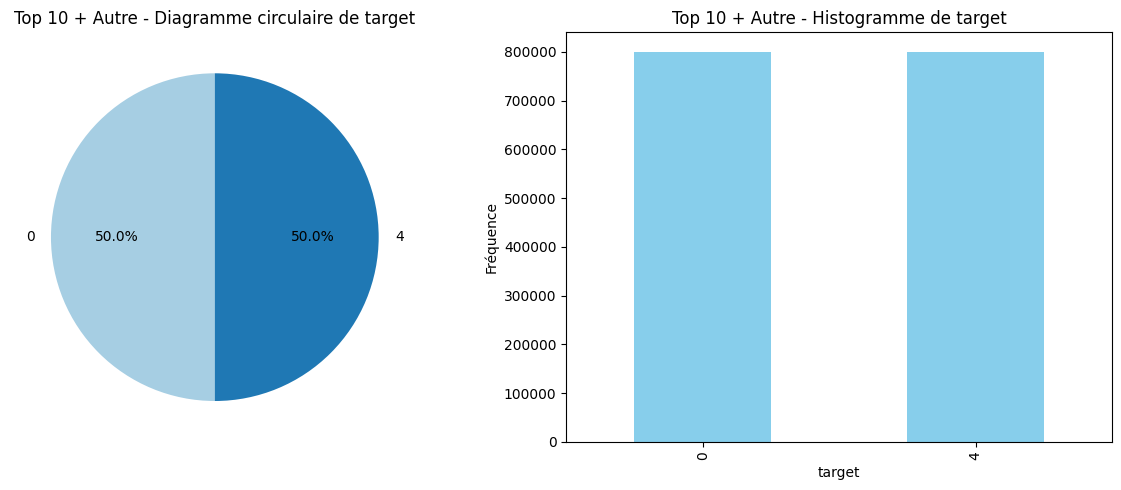

In [4]:
tracer_pie_bar_top10_autre(data, ['target'])

# On peut remarquer que le jeu de données ne contient que des tweets notés 0 (négatif) ou 4 (positif)

# Prétraitement du texte brut pour optimiser le résultat de l'extraction des embeddings

In [3]:
data_processed_text = preprocess_text_columns(data, 'text')

In [4]:
data_processed_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 10 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   target     1600000 non-null  int64 
 1   id         1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   flag       1600000 non-null  object
 4   user       1600000 non-null  object
 5   text       1600000 non-null  object
 6   text_bow   1600000 non-null  object
 7   text_w2v   1600000 non-null  object
 8   text_bert  1600000 non-null  object
 9   text_use   1600000 non-null  object
dtypes: int64(2), object(8)
memory usage: 122.1+ MB


# Extraction Bag of Words & TF-IDF

In [13]:
data_bow_tfidf = extract_bow_tfidf_features_from_dataframe(
    data_processed_text,
    'text_bow',
    include_raw_features=False,  # Ne garder que les projections
    add_2d_projection=True,
    add_3d_projection=True
)[0]  # On ne prend que le DataFrame

Fitting vectorizers...
Processing BoW features...
Processing batches with dimensionality reduction...
Processing TF-IDF features...
Processing batches with dimensionality reduction...
Adding projections...
Processing complete!


# Extraction embeddings classiques

# Extraction GloVE

In [19]:
data_orb_bow_tfidf_glove = extract_classic_embeddings(
    df=data_processed_text,
    text_col='text_w2v',
    embedding_type='glove',
    embedding_path='glove.6B.300d.txt'
)

Chargement du modèle d'embedding...
Extraction des embeddings par lots...


Traitement des textes: 100%|███████████████████████████████████████████████████████████████████████████| 1600/1600 [01:11<00:00, 22.38it/s]


Ajout des projections dimensionnelles...
Calcul des projections PCA 2D...
Calcul des projections PCA 3D...
Traitement terminé avec succès!


# Extraction BERT

## Extraction de features qui capturent 50% de variance cumulée par PCA

In [5]:
data_bert_extracted_50 = add_bert_embeddings(
    df=data_processed_text,
    text_column="text_bert",
    sample_size=10000,
    pca_variance_threshold=0.50,
    batch_size=100
)

2025-05-29 15:18:33.119543: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Loading BERT model and preprocessor...
Encoding text with BERT...


BERT encoding: 100%|█| 100/100 [18:10<0


Adding projections...
✅ Embedding generation complete.


In [7]:
data_bert_extracted_50.drop(columns=['text_bert_bert_embedding','date','flag','user','text_use','text_w2v','text_bert', 'text_bow'], inplace=True)

In [8]:
import pandas as pd
data_bert_extracted_50.to_csv('data/data_bert_50_percent_PCA.csv')

## Extraction de features qui capturent 90%% de variance cumulée par PCA

In [13]:
data_bert_extracted_90 = add_bert_embeddings(
    df=data_processed_text,
    text_column="text_bert",
    sample_size=10000,
    pca_variance_threshold=0.90,
    batch_size=100
)

Loading BERT model and preprocessor...
Encoding text with BERT...


BERT encoding: 100%|█| 100/100 [18:03<0


Adding projections...
✅ Embedding generation complete.


In [18]:
import pandas as pd
data_bert_extracted_90.to_csv('data/data_bert_90_percent_PCA.csv')

# Extraction USE

In [5]:
data_use_extracted = add_use_embeddings(
    data_processed_text,
    text_column='text_use',
    add_2d_projection=True,
    add_3d_projection=True,
    normalize_embeddings=False,
    batch_size=100
)

Loading USE model...


2025-05-22 22:04:18.070259: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Processing text embeddings...


Generating embeddings: 100%|█████████| 16000/16000 [02:15<00:00, 118.47batch/s]


Adding dimensional projections...
Embedding generation complete!


## Extraction de features qui capturent 30% de variance cumulée par PCA

In [8]:
data_use_extracted_30 = add_use_embeddings(data_processed_text,
                                        "text_use",
                                        pca_variance_threshold=0.30,
                                        batch_size=100)

Loading USE model...
Processing text embeddings...


Generating embeddings: 100%|█████████| 16000/16000 [02:19<00:00, 114.62batch/s]


Adding dimensional projections...
Embedding generation complete!


## Extraction de features qui capturent 40% de variance cumulée par PCA

In [5]:
data_use_extracted_40 = add_use_embeddings(data_processed_text,
                                        "text_use",
                                        pca_variance_threshold=0.40,
                                        batch_size=100)

Loading USE model...
Processing text embeddings...


Generating embeddings: 100%|█████████| 16000/16000 [02:27<00:00, 108.12batch/s]


Adding dimensional projections...
Embedding generation complete!


## Extraction de features qui capturent 70% de variance cumulée par PCA

In [6]:
data_use_extracted_70 = add_use_embeddings(data_processed_text,
                                        "text_use",
                                        pca_variance_threshold=0.70,
                                        batch_size=100)

Loading USE model...


2025-05-29 12:25:48.923671: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Processing text embeddings...


Generating embeddings: 100%|█| 16000/16


Adding dimensional projections...
Embedding generation complete!


In [9]:
import pandas as pd
data_use_extracted_30.to_csv('data/data_use_30_percent_PCA.csv')
data_use_extracted_40.to_csv('data/data_use_40_percent_PCA.csv')
data_use_extracted_70.to_csv('data/data_use_70_percent_PCA.csv')